## Import Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import math

## Question 1: Find all optimal secondary structures of the RNA sequence AAUACUCCGUUGCAGCAU

*1.Show the filled-in tables W, V and all backtrack paths corresponding to the minimum score.*


In [2]:
'''
Explanation of the symbols that used for the backtrack matrix:
← : means that there is a gap in the column, thus we move to the left  (no match)
↓ : means that there is a gap in the row, thus we move to down (no match)
Ⓗ : means that the score comes from the V-matrix, in which we take the hairpin energy score (occurance of hairpin)
* : means that the score comes from the V-matrix, in which we take the pair-matching energy score (pair matching)
Ⓚ : means that there is an internal match in K nucleotides distance (byfurcation)
'''

rna = 'AAUACUCCGUUGCAGCAU'

#size of columns and rows of the V,W matrix
n = len(rna)

#initialize W,V score matrices and backtrack matrix
V = np.empty((n,n))
W = np.empty((n,n))
Backtrack_matrix = np.full((n,n),"", dtype = 'object')

#fill with infinite values the V,W elements that don't satisfy the criteria
for i in range(n):
  for j in range(n):
    if i < j +3:
      W[j,i] = np.inf
      V[j,i] = np.inf
      Backtrack_matrix[j,i] = "-"

#compute the hairpin energy function
def h(j,i):
  if i > j:
    return i-j+3
  return np.inf

#compute the score of the bond function
def s(j,i):
  watson_pair = {"A":"U","G":"C","C":"G","U":"A"}
  base1 = rna[i]
  base2 = rna[j]
  #Watson - Crick pair = -4 
  if watson_pair[base1] == base2:
    return -4
  # GU pair = 0
  elif (base1+base2 == "GU" or base2+base1 == "GU"):
    return  0
  #any other case returns 4
  return  4

#compute the V-energy function
def V_energy(j,i):
  hairpinEnergy = h(j+1,i-1) + s(j,i)
  matchingEnergy = W[j+1,i-1] + s(j,i)
  V[j,i] = min(hairpinEnergy,matchingEnergy)
  return V[j,i]

#compute the W-energy and the backtrack matrix
def W_energy(j,i):
  left = W[j,i-1]
  down = W[j+1,i]
  hairpin = h(j+1,i -1) + s(j,i)
  match = W[j+1,i-1] + s(j,i)
  V_energy(j,i)
  k_loop = []
  for k in range(j+2,i):
    k_loop.append(W[k,i] + W[j,k-1])
  min_k = min(k_loop)
  W[j,i] = min(left,down,V[j,i],min_k)
#filling the backtrack matrix
  
  cases = [left,down,hairpin,match,min_k]
  directions = ["←","↓","Ⓗ","*","Ⓚ"]
  for idx in range(len(cases)):
    if W[j,i] == cases[idx]:
      Backtrack_matrix[j,i] += directions[idx] 
#fill the upper triangular matrix diagonally
for k in range(3,n+1):
    for j in range(n-k):
        for i in range(n):
            if j+k == i:
                W_energy(j,i)


In [3]:
#print out the W score matrix
print("W score matrix")
pd.DataFrame(W, columns=list(rna), index = list(rna))

W score matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,inf,inf,inf,8.0,8.0,1.0,1.0,1.0,1.0,-3.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-11.0,-15.0
A,inf,inf,inf,inf,8.0,1.0,1.0,1.0,1.0,-3.0,-7.0,-7.0,-7.0,-7.0,-7.0,-7.0,-11.0,-15.0
U,inf,inf,inf,inf,inf,8.0,8.0,8.0,1.0,-3.0,-3.0,-3.0,-3.0,-7.0,-7.0,-7.0,-11.0,-12.0
A,inf,inf,inf,inf,inf,inf,8.0,8.0,1.0,-3.0,-3.0,-3.0,-3.0,-3.0,-7.0,-7.0,-8.0,-12.0
C,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,1.0,1.0,0.0,0.0,-3.0,-7.0,-7.0,-8.0,-8.0
U,inf,inf,inf,inf,inf,inf,inf,inf,4.0,4.0,4.0,1.0,1.0,-3.0,-4.0,-4.0,-8.0,-8.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,8.0,1.0,1.0,0.0,-4.0,-4.0,-4.0,-4.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,1.0,0.0,-4.0,-4.0,-4.0,-4.0
G,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,0.0,0.0,-4.0,-4.0,-4.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,0.0,0.0,0.0,-4.0,-4.0


In [4]:
#print out the V score matrix
print("V score matrix")
pd.DataFrame(V, columns=list(rna), index = list(rna))

V score matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,inf,inf,inf,8.0,9.0,2.0,5.0,5.0,5.0,-3.0,-7.0,-3.0,-3.0,-3.0,-3.0,-3.0,-3.0,-15.0
A,inf,inf,inf,inf,8.0,1.0,10.0,11.0,12.0,-3.0,-7.0,1.0,1.0,1.0,-3.0,-3.0,-3.0,-15.0
U,inf,inf,inf,inf,inf,8.0,9.0,10.0,7.0,5.0,1.0,-3.0,1.0,-7.0,-3.0,-3.0,-11.0,-4.0
A,inf,inf,inf,inf,inf,inf,8.0,9.0,10.0,-3.0,-3.0,5.0,4.0,4.0,1.0,-3.0,-3.0,-12.0
C,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,8.0,8.0,0.0,5.0,5.0,-7.0,0.0,0.0,-4.0
U,inf,inf,inf,inf,inf,inf,inf,inf,4.0,9.0,10.0,7.0,5.0,-3.0,0.0,0.0,-8.0,0.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,9.0,2.0,5.0,5.0,-4.0,0.0,0.0,0.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,10.0,5.0,-4.0,4.0,0.0,0.0
G,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,10.0,4.0,-4.0,4.0,-4.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,8.0,1.0,0.0,4.0,-4.0,1.0


In [5]:
#print out the backtrack matrix
print("Backtrack matrix")
pd.DataFrame(Backtrack_matrix, columns=list(rna), index = list(rna))

Backtrack matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,-,-,-,Ⓗ,←↓,↓,←↓,←↓,←↓,↓*,↓*,←↓,←↓,←↓,←↓,←↓,↓,↓*
A,-,-,-,-,Ⓗ,Ⓗ,←,←,←↓,↓*,*,←,←,←↓,←↓,←↓,↓,*
U,-,-,-,-,-,Ⓗ,←↓,←↓,↓,↓,←↓,←↓*,←↓,*,←↓,←↓,*,↓
A,-,-,-,-,-,-,Ⓗ,←↓,↓,*,←*,←,←,←↓Ⓚ,↓,←↓,↓,*
C,-,-,-,-,-,-,-,Ⓗ,Ⓗ,←,←,*,←,↓,*,←,↓,←↓
U,-,-,-,-,-,-,-,-,Ⓗ,←,←,↓,←↓,*,↓,←↓,*,←
C,-,-,-,-,-,-,-,-,-,Ⓗ,←↓,↓,←↓,↓,↓*,←↓,←↓,←↓
C,-,-,-,-,-,-,-,-,-,-,Ⓗ,Ⓗ,←↓,↓,*,←↓,←↓,←↓
G,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,Ⓗ,↓,←↓,*,←↓,←↓*
U,-,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,↓,←↓*,←↓,*,←


*2. Run the algorithm on the same RNA sequence, same stem energy, but with V (j,i) = W(j,i) = 1 for all
i < j + 5 and hairpin energy h(j,i) = 2(i - j + 5). Show the filled-in tables W, V and all backtrack paths
corresponding to the minimum score*

In [6]:
'''
Explanation of the symbols that used for the backtrack matrix:
← : means that there is a gap in the column, thus we move to the left  (no match)
↓ : means that there is a gap in the row, thus we move to down (no match)
H : means that the score comes from the V-matrix, in which we take the hairpin energy score (occurance of hairpin)
* : means that the score comes from the V-matrix, in which we take the pair-matching energy score (pair matching)
↖ : means that there is an internal match in K nucleotides distance (byfurcation)
'''

rna = 'AAUACUCCGUUGCAGCAU'

#size of columns and rows of the V,W matrix
n = len(rna)

#initialize W,V score matrices and backtrack matrix
V = np.empty((n,n))
W = np.empty((n,n))
Backtrack_matrix = np.full((n,n),"", dtype = 'object')

#fill with infinite values the V,W elements that don't satisfy the criteria
for i in range(n):
  for j in range(n):
    if i < j + 5:
      W[j,i] = np.inf
      V[j,i] = np.inf
      Backtrack_matrix[j,i] = "-"

#compute the hairpin energy function
def h(j,i):
  if i > j:
    return 2*(i-j+5)
  return np.inf

#compute the score of the bond function
def s(j,i):
  watson_pair = {"A":"U","G":"C","C":"G","U":"A"}
  base1 = rna[i]
  base2 = rna[j]
  #Watson - Crick pair = -4 
  if watson_pair[base1] == base2:
    return -4
  # GU pair = 0
  elif (base1+base2 == "GU" or base2+base1 == "GU"):
    return  0
  #any other case returns 4
  return  4

#compute the V-energy function
def V_energy(j,i):
  hairpinEnergy = h(j+1,i-1) + s(j,i)
  matchingEnergy = W[j+1,i-1] + s(j,i)
  V[j,i] = min(hairpinEnergy,matchingEnergy)
  return V[j,i]

#compute the W-energy and the backtrack matrix
def W_energy(j,i):
  left = W[j,i-1]
  down = W[j+1,i]
  hairpin = h(j+1,i -1) + s(j,i)
  match = W[j+1,i-1] + s(j,i)
  V_energy(j,i)
  k_loop = []
  for k in range(j+2,i):
    k_loop.append(W[k,i] + W[j,k-1])
  min_k = min(k_loop)
  W[j,i] = min(left,down,V[j,i],min_k)

#filling the backtrack matrix
  cases = [left,down,hairpin,match,min_k]
  directions = ["←","↓","Ⓗ","*","Ⓚ"]
  for idx in range(len(cases)):
    if W[j,i] == cases[idx]:
      Backtrack_matrix[j,i] += directions[idx] 

#fill the upper triangular matrix diagonally
for k in range(5,n+1):
    for j in range(n-k):
        for i in range(n):
            if j+k == i:
                W_energy(j,i)

  

In [9]:
#print out W score matrix
print("W score matrix")
pd.DataFrame(W, columns=list(rna), index = list(rna))

W score matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,inf,inf,inf,inf,inf,12.0,12.0,12.0,12.0,12.0,10.0,10.0,10.0,8.0,4.0,4.0,0.0,-4.0
A,inf,inf,inf,inf,inf,inf,20.0,20.0,18.0,14.0,10.0,10.0,10.0,8.0,4.0,4.0,0.0,-4.0
U,inf,inf,inf,inf,inf,inf,inf,20.0,18.0,14.0,14.0,12.0,12.0,8.0,4.0,4.0,0.0,0.0
A,inf,inf,inf,inf,inf,inf,inf,inf,20.0,14.0,14.0,12.0,12.0,8.0,4.0,4.0,4.0,0.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,20.0,12.0,12.0,8.0,4.0,4.0,4.0,4.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,12.0,12.0,8.0,8.0,8.0,8.0,8.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,12.0,12.0,12.0,12.0,12.0,12.0,12.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,20.0,16.0,12.0,12.0,12.0
G,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,16.0,12.0,12.0,12.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,16.0,16.0,14.0,14.0


In [8]:
#print out V score matrix
print("V score matrix")
pd.DataFrame(V, columns=list(rna), index = list(rna))

V score matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,inf,inf,inf,inf,inf,12.0,22.0,24.0,24.0,14.0,10.0,14.0,14.0,14.0,12.0,8.0,8.0,-4.0
A,inf,inf,inf,inf,inf,inf,20.0,22.0,24.0,14.0,10.0,18.0,16.0,16.0,12.0,8.0,8.0,-4.0
U,inf,inf,inf,inf,inf,inf,inf,20.0,18.0,24.0,18.0,14.0,16.0,8.0,8.0,8.0,0.0,8.0
A,inf,inf,inf,inf,inf,inf,inf,inf,20.0,14.0,16.0,24.0,16.0,16.0,12.0,8.0,8.0,0.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,22.0,16.0,16.0,16.0,4.0,12.0,12.0,12.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,18.0,16.0,8.0,12.0,16.0,8.0,16.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,12.0,22.0,24.0,16.0,20.0,16.0,16.0
C,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,22.0,16.0,20.0,16.0,16.0
G,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,20.0,22.0,12.0,20.0,14.0
U,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,16.0,22.0,16.0,18.0


In [7]:
#print out the backtrack matrix
print("Backtrack matrix")
pd.DataFrame(Backtrack_matrix, columns=list(rna), index = list(rna))

Backtrack matrix


,A,A,U,A,C,U,C,C,G,U,U,G,C,A,G,C,A,U
A,-,-,-,-,-,Ⓗ,←,←,←,←,↓*,←↓,←↓,↓,↓,←↓,↓,↓*
A,-,-,-,-,-,-,Ⓗ,←↓,↓,↓*,*,←,←,↓,↓,←↓,↓,*
U,-,-,-,-,-,-,-,Ⓗ,Ⓗ,↓,←↓,↓,←↓,↓*,↓,←↓,*,←↓
A,-,-,-,-,-,-,-,-,Ⓗ,Ⓗ,←,↓,←↓,↓,↓,←↓,←↓,*
C,-,-,-,-,-,-,-,-,-,Ⓗ,←↓,↓,←↓,↓,*,←,←,←
U,-,-,-,-,-,-,-,-,-,-,Ⓗ,↓,←↓,*,←,←,←*,←
C,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,←,←,←,←↓,←↓,←↓
C,-,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,←↓,↓Ⓗ*,↓,←↓,←↓
G,-,-,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,↓,*,←,←
U,-,-,-,-,-,-,-,-,-,-,-,-,-,-,Ⓗ,←,↓,←↓


## Question 2: c-RMSD and d-RMSD

*1. Use your c-RMSD code to compute the optimal translation and rotation to minimize c-RMSD between the first 2 conformations.*

In [10]:
#loading the data as pandas dataframe. Wwe strip the first 2 lines of the file
data = pd.read_csv("80_conformations.txt", sep = "\t",header=None,names=["x","y","z"],skiprows=2)

#separate the different conformations
conformations = np.split(data, 80)

conf1 = conformations[0]
conf2 = conformations[1]

#computing the minimum c-RMSD function
def c_RMSD(x,y):
    xc = np.mean(x)
    yc = np.mean(y)

    #optimal translation - substracting centroid from each point of x and y respectively.
    X = x - xc
    Y = y -yc
    
    #optimal rotation
    Xtr = X.transpose()
    XtrY = np.dot(Xtr,Y)
    u, s, vtr = np.linalg.svd(XtrY)
    
    #estimate rotational matrix Q
    q = np.dot(u,vtr)
    det_q = np.linalg.det(q)
    if det_q < 0:
        q = np.dot((u[0], u[1], -u[2]),vtr)

    #calculate min c-RMSD
    final_matrix = np.dot(X,q) - Y
    RMSD = np.linalg.norm(final_matrix)/np.sqrt(len(final_matrix))
    return RMSD

print(f"The minimum c-RMSD distance between the first and second conformation is {c_RMSD(conf1,conf2)} Å.")


The minimum c-RMSD distance between the first and second conformation is 0.6271694758794248 Å.


*2. Compute the c-RMSD distances between all (369 2) pairs of conformations. Compute the mean and median c-RMSD distance and draw a histogram of all distances in 10 classes.*

The mean c-RMSD distance between all (369 2) pairs of conformations is 11.32272359608973 Å.
The median c-RMSD distance between all (369 2) pairs of conformations is 11.327072495387196 Å.


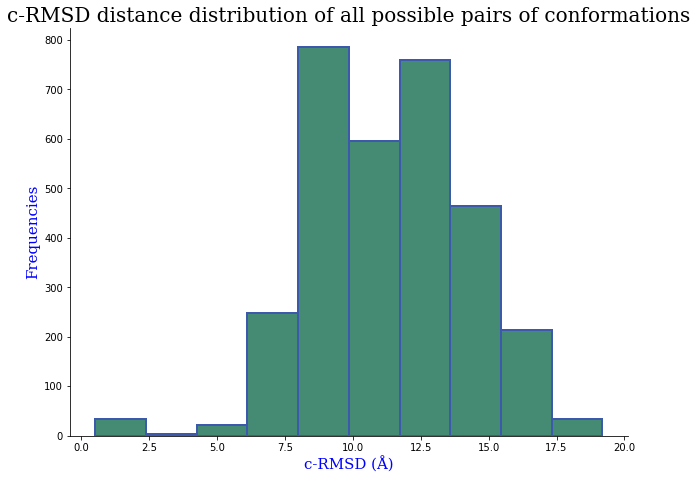

In [39]:
rmsd_list = []

#Create a list with all c-RMSD for all possible 2-by-2 comparisons
for i in range(len(conformations)):
    for j in range(i+1,len(conformations)):
        rmsd = c_RMSD(conformations[i], conformations[j])
        rmsd_list.append(rmsd)

#calculate mean and median c-RMSD distance
mean_rmsd = np.mean(rmsd_list)
median_rmsd = np.median(rmsd_list)
print(f"The mean c-RMSD distance between all (369 2) pairs of conformations is {mean_rmsd} Å.")
print(f"The median c-RMSD distance between all (369 2) pairs of conformations is {median_rmsd} Å.")

#plot the c-RMSD histogram with 10 bins
fig, ax = plt.subplots(figsize=(10,7.5))
plt.hist(rmsd_list, 10,color = 	'#458B74',edgecolor='#3D59AB',linewidth=2)
plt.xlabel("c-RMSD (Å)",fontdict = {'family':'serif','color':'blue','size':15})
plt.ylabel("Frequencies",fontdict = {'family':'serif','color':'blue','size':15})
plt.title("c-RMSD distance distribution of all possible pairs of conformations",fontdict = {'family':'serif','color':'black','size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('c_RMSD.png',transparent = True)

*3. Repeat (2) for d-RMSD using all k = (n 2) distances within each conformation, or a random subset of k = n distances.*

This section takes approx. 20 min.

The mean d-RMSD distance between all (369 2) pairs of conformations is 11.464140288701854 Å.
The median d-RMSD distance between all (369 2) pairs of conformations is 11.318978603904284 Å.


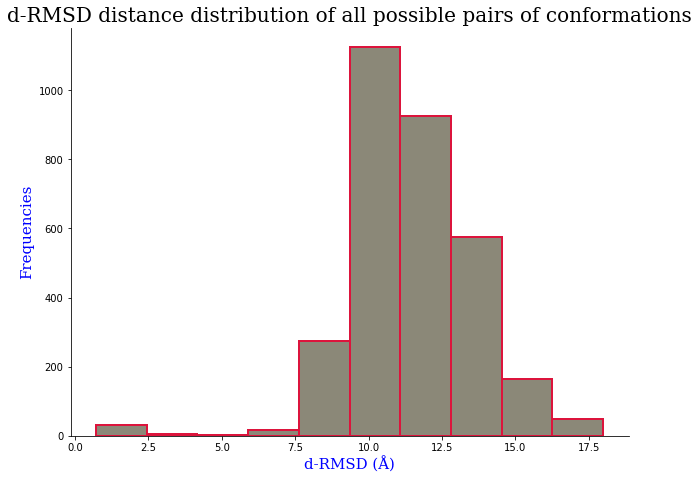

In [38]:
#at first, we transform the dataframe of conofrmations into np.array matrix
conformations=np.array([np.array(xi) for xi in conformations])
#compute the d-RMSD function
def d_RMSD(x,y):
    dist_x = []
    dist_y = []
    
    # Calculate distances of atoms in each conformation
    for i in range(len(x)):
        for j in range (1+i,len(x)):
            dist_x.append(np.sqrt((x[i]-x[j])**2))
            dist_y.append(np.sqrt((y[i]-y[j])**2))
    
    #Convert the lists of distances into np.arrays
    dist_x = np.array(dist_x)
    dist_y = np.array(dist_y)
    #compute the d-RMSD between 2 given conformations
    d_RMSD = np.sqrt(np.sum((dist_x-dist_y)**2)/len(dist_x))
    return d_RMSD

#Create the list of d_rmsd distances between all possible pairs of conformations
d_rmsd_list = []
for i in range(len(conformations)):
    for j in range(i+1,len(conformations)):
        rmsd = d_RMSD(conformations[i],conformations[j])
        d_rmsd_list.append(rmsd)

            
#calculate mean and median d-RMSD distance
mean_rmsd = np.mean(d_rmsd_list)
median_rmsd = np.median(d_rmsd_list)
print(f"The mean d-RMSD distance between all (369 2) pairs of conformations is {mean_rmsd} Å.")
print(f"The median d-RMSD distance between all (369 2) pairs of conformations is {median_rmsd} Å.")            

#plot the d-RMSD histogram with 10 bins
fig, ax = plt.subplots(figsize=(10,7.5))
plt.hist(d_rmsd_list, 10,color = 	'#8B8878',edgecolor='#DC143C',linewidth=2)
plt.xlabel("d-RMSD (Å)",fontdict = {'family':'serif','color':'blue','size':15})
plt.ylabel("Frequencies",fontdict = {'family':'serif','color':'blue','size':15})
plt.title("d-RMSD distance distribution of all possible pairs of conformations",fontdict = {'family':'serif','color':'black','size':20})
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig('d_RMSD.png',transparent = True)